# Clustering Analysis

<br>
<br>

### Overview

    K-means
    
    Agglomeative Clustering
    
    Density Based 


In [1]:
from IPython.display import Image
%matplotlib inline

In [2]:
# to execute and return the results of executions
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Grouping objects by similarity using k-means

In [3]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=150, 
                  n_features=2, 
                  centers=3, 
                  cluster_std=0.5, 
                  shuffle=True, 
                  random_state=0)

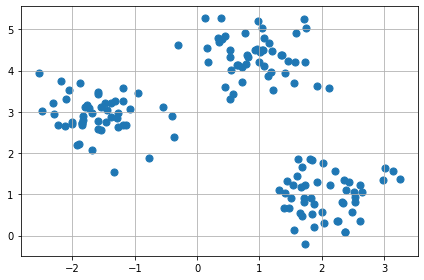

In [4]:
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1],  marker='o', s=50)
plt.grid()
plt.tight_layout()
#plt.savefig('./figures/spheres.png', dpi=300)
plt.show()

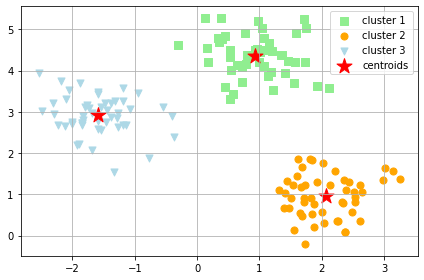

In [5]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3, 
            init='random', 
            n_init=10, 
            max_iter=300,
            tol=1e-04,
            random_state=0)
y_km = km.fit_predict(X)

plt.scatter(X[y_km == 0, 0],
            X[y_km == 0, 1],
            s=50,
            c='lightgreen',
            marker='s',
            label='cluster 1')
plt.scatter(X[y_km == 1, 0],
            X[y_km == 1, 1],
            s=50,
            c='orange',
            marker='o',
            label='cluster 2')
plt.scatter(X[y_km == 2, 0],
            X[y_km == 2, 1],
            s=50,
            c='lightblue',
            marker='v',
            label='cluster 3')
plt.scatter(km.cluster_centers_[:, 0],
            km.cluster_centers_[:, 1],
            s=250,
            marker='*',
            c='red',
            label='centroids')
plt.legend()
plt.grid()
plt.tight_layout()
#plt.savefig('./figures/centroids.png', dpi=300)
plt.show()

<br>

In [6]:
print('Distortion: %.2f' % km.inertia_)

Distortion: 72.48


# Question:

## What is the meaning of the parameter inertia?

# Choosing the optimal number of clusters

## Using the elbow method to find the optimal number of clusters 

 ----K-means++ is considered the best way to initialize the centroids
 --- experimental strategy to choose K ( the number of clusters)
 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=1, random_state=0)

KMeans(n_clusters=2, random_state=0)

KMeans(n_clusters=3, random_state=0)

KMeans(n_clusters=4, random_state=0)

KMeans(n_clusters=5, random_state=0)

KMeans(n_clusters=6, random_state=0)

KMeans(n_clusters=7, random_state=0)

KMeans(random_state=0)

KMeans(n_clusters=9, random_state=0)

KMeans(n_clusters=10, random_state=0)

Text(0.5, 0, 'Number of clusters')

Text(0, 0.5, 'Distortion')

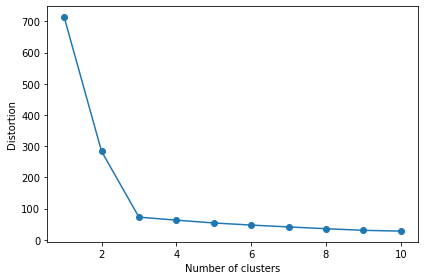

In [7]:

distortions = []
for i in range(1, 11):
    km = KMeans(n_clusters=i, 
                init='k-means++', 
                n_init=10, 
                max_iter=300, 
                random_state=0)
    km.fit(X)
    distortions.append(km.inertia_)
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.tight_layout()
#plt.savefig('./figures/elbow.png', dpi=300)
plt.show()

## Using the shilhouette coefficient method to find the optimal number of clusters 

KElbowVisualizer(ax=<AxesSubplot:>, estimator=KMeans(n_clusters=29), k=(2, 30),
                 metric='silhouette')

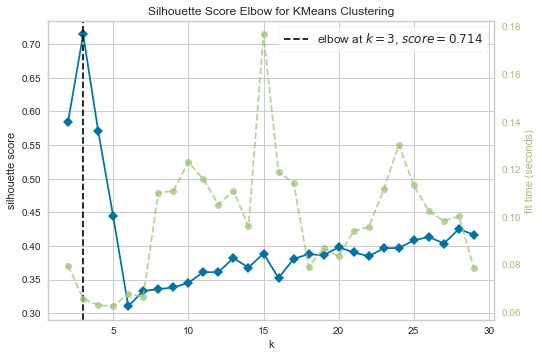

<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [8]:

# Import ElbowVisualizer
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(2,30),metric='silhouette', timings= True)
visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

## Quantifying the quality of clustering  via silhouette plots

<BarContainer object of 50 artists>

<BarContainer object of 50 artists>

<BarContainer object of 50 artists>

([<matplotlib.axis.YTick at 0x2a05031c490>,
 [Text(0, 25.0, '1'), Text(0, 75.0, '2'), Text(0, 125.0, '3')])

Text(0, 0.5, 'Cluster')

Text(0.5, 0, 'Silhouette coefficient')

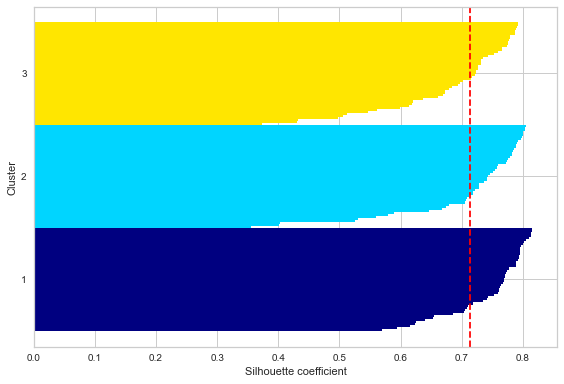

Silhouette coefficiente =  0.7143417887288687


In [9]:
import numpy as np
from matplotlib import cm
from sklearn.metrics import silhouette_samples

km = KMeans(n_clusters=3, 
            init='k-means++', 
            n_init=10, 
            max_iter=300,
            tol=1e-04,
            random_state=0)
y_km = km.fit_predict(X)

cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(X, y_km, metric='euclidean')
y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, 
             edgecolor='none', color=color)

    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_vals)
    
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color="red", linestyle="--") 

plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')

plt.tight_layout()
# plt.savefig('./figures/silhouette.png', dpi=300)
plt.show()

print('Silhouette coefficiente = ', silhouette_avg)

### Comparison to "bad" clustering:

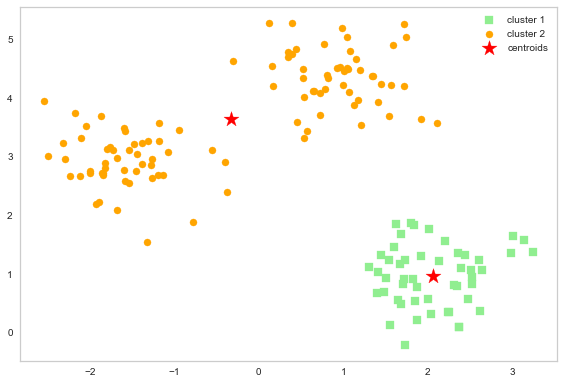

In [10]:
km = KMeans(n_clusters=2,
            init='k-means++',
            n_init=10,
            max_iter=300,
            tol=1e-04,
            random_state=0)
y_km = km.fit_predict(X)

plt.scatter(X[y_km == 0, 0],
            X[y_km == 0, 1],
            s=50,
            c='lightgreen',
            marker='s',
            label='cluster 1')
plt.scatter(X[y_km == 1, 0],
            X[y_km == 1, 1],
            s=50,
            c='orange',
            marker='o',
            label='cluster 2')

plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
            s=250, marker='*', c='red', label='centroids')
plt.legend()
plt.grid()
plt.tight_layout()
#plt.savefig('./figures/centroids_bad.png', dpi=300)
plt.show()

<BarContainer object of 50 artists>

<BarContainer object of 100 artists>

([<matplotlib.axis.YTick at 0x2a05152cca0>,
 [Text(0, 25.0, '1'), Text(0, 100.0, '2')])

Text(0, 0.5, 'Cluster')

Text(0.5, 0, 'Silhouette coefficient')

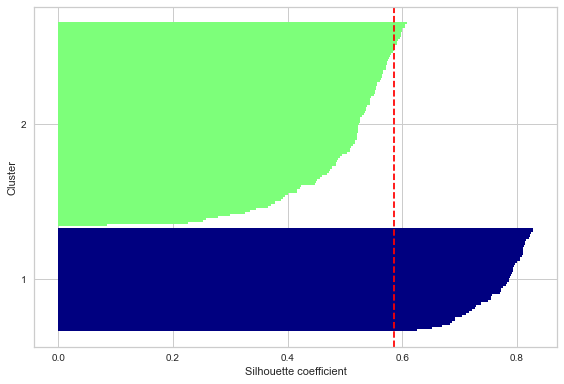

In [11]:
cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(X, y_km, metric='euclidean')
y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, 
             edgecolor='none', color=color)

    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_vals)
    
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color="red", linestyle="--") 

plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')

plt.tight_layout()
# plt.savefig('./figures/silhouette_bad.png', dpi=300)
plt.show()

# Question:

## What is the meaning of the "silhouette coefficient"?

# Organizing clusters as a hierarchical tree

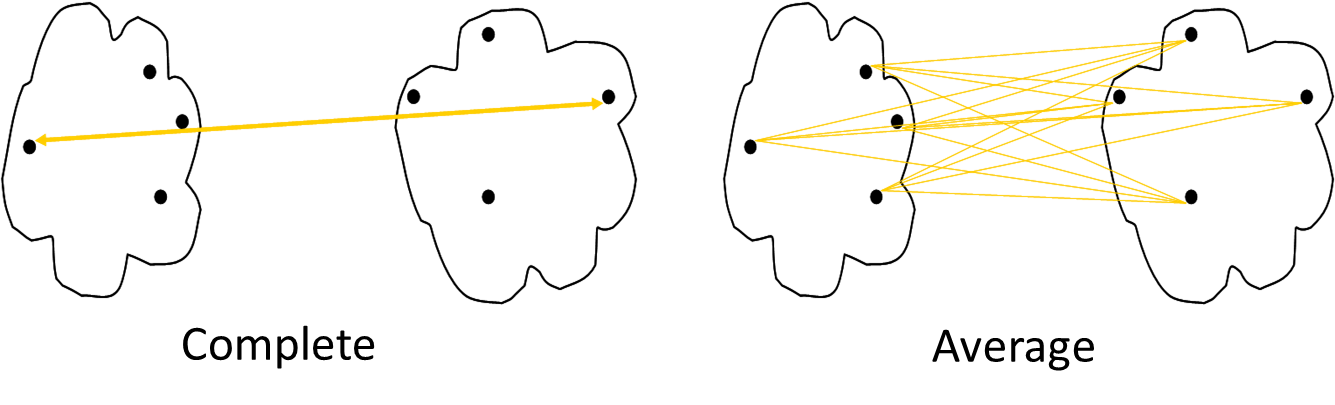

In [12]:
Image(filename='IMAGES/linkage.png', width=400) 

In [13]:
import pandas as pd
import numpy as np

np.random.seed(123)

variables = ['X', 'Y', 'Z']
labels = ['ID_0', 'ID_1', 'ID_2', 'ID_3', 'ID_4']

X = np.random.random_sample([5, 3])*10
df = pd.DataFrame(X, columns=variables, index=labels)
df

,X,Y,Z
ID_0,6.964692,2.861393,2.268515
ID_1,5.513148,7.194690,4.231065
ID_2,9.807642,6.848297,4.809319
ID_3,3.921175,3.431780,7.290497
ID_4,4.385722,0.596779,3.980443


<br>

## Performing hierarchical clustering on a distance matrix

In [14]:
from scipy.spatial.distance import pdist, squareform

row_dist = pd.DataFrame(squareform(pdist(df, metric='euclidean')),
                        columns=labels,
                        index=labels)
row_dist

,ID_0,ID_1,ID_2,ID_3,ID_4
ID_0,0.000000,4.973534,5.516653,5.899885,3.835396
ID_1,4.973534,0.000000,4.347073,5.104311,6.698233
ID_2,5.516653,4.347073,0.000000,7.244262,8.316594
ID_3,5.899885,5.104311,7.244262,0.000000,4.382864
ID_4,3.835396,6.698233,8.316594,4.382864,0.000000


We can either pass a condensed distance matrix (upper triangular) from the `pdist` function, or we can pass the "original" data array and define the `metric='euclidean'` argument in `linkage`. However, we should not pass the squareform distance matrix, which would yield different distance values although the overall clustering could be the same.

In [15]:
# 2. correct approach: Condensed distance matrix
from scipy.cluster.hierarchy import linkage
row_clusters = linkage(pdist(df, metric='euclidean'), method='complete')
print(row_clusters)
pd.DataFrame(row_clusters,
             columns=['row label 1', 'row label 2',
                      'distance', 'no. of items in clust.'],
             index=['cluster %d' % (i + 1) 
                    for i in range(row_clusters.shape[0])])

[[0.         4.         3.83539555 2.        ]
 [1.         2.         4.34707339 2.        ]
 [3.         5.         5.89988504 3.        ]
 [6.         7.         8.31659367 5.        ]]


,row label 1,row label 2,distance,no. of items in clust.
cluster 1,0.0,4.0,3.835396,2.0
cluster 2,1.0,2.0,4.347073,2.0
cluster 3,3.0,5.0,5.899885,3.0
cluster 4,6.0,7.0,8.316594,5.0


In [16]:
# 3. correct approach: Input sample matrix

row_clusters = linkage(df.values, method='complete', metric='euclidean')
pd.DataFrame(row_clusters,
             columns=['row label 1', 'row label 2',
                      'distance', 'no. of items in clust.'],
             index=['cluster %d' % (i + 1)
                    for i in range(row_clusters.shape[0])])

,row label 1,row label 2,distance,no. of items in clust.
cluster 1,0.0,4.0,3.835396,2.0
cluster 2,1.0,2.0,4.347073,2.0
cluster 3,3.0,5.0,5.899885,3.0
cluster 4,6.0,7.0,8.316594,5.0


['ID_0', 'ID_1', 'ID_2', 'ID_3', 'ID_4']


Text(55.375, 0.5, 'Euclidean distance')

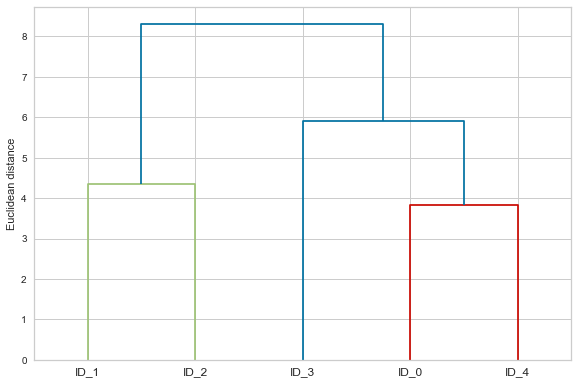

In [17]:
from scipy.cluster.hierarchy import dendrogram

# make dendrogram black (part 1/2)
# from scipy.cluster.hierarchy import set_link_color_palette
# set_link_color_palette(['black'])
print(labels)
row_dendr = dendrogram(row_clusters, 
                       labels=labels,
                       # make dendrogram black (part 2/2)
                       # color_threshold=np.inf
                       )
plt.tight_layout()
plt.ylabel('Euclidean distance')
#plt.savefig('./figures/dendrogram.png', dpi=300, 
#            bbox_inches='tight')
plt.show()

# Question:

## Considering two clusters identify the elements of each cluster

## Attaching dendrograms to a heat map

[]

[]

C:\Users\AnaSebastião\AppData\Local\Temp\ipykernel_6136\1005607424.py:21: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  fig.colorbar(cax)


C:\Users\AnaSebastião\AppData\Local\Temp\ipykernel_6136\1005607424.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  axm.set_xticklabels([''] + list(df_rowclust.columns))


[Text(-1.0, 1, ''),
 Text(0.0, 1, 'X'),
 Text(1.0, 1, 'Y'),
 Text(2.0, 1, 'Z'),
 Text(3.0, 1, '')]

C:\Users\AnaSebastião\AppData\Local\Temp\ipykernel_6136\1005607424.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  axm.set_yticklabels([''] + list(df_rowclust.index))


[Text(0, -1.0, ''),
 Text(0, 0.0, 'ID_4'),
 Text(0, 1.0, 'ID_0'),
 Text(0, 2.0, 'ID_3'),
 Text(0, 3.0, 'ID_2'),
 Text(0, 4.0, 'ID_1'),
 Text(0, 5.0, '')]

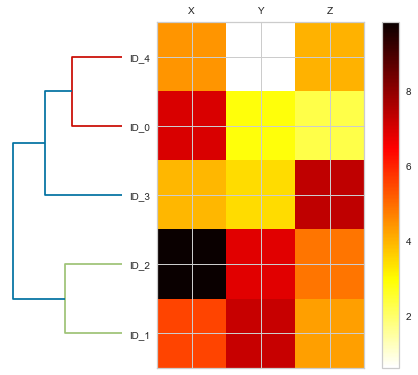

In [18]:
# plot row dendrogram
fig = plt.figure(figsize=(8, 8), facecolor='white')
axd = fig.add_axes([0.09, 0.1, 0.2, 0.6])

# note: for matplotlib < v1.5.1, please use orientation='right'
row_dendr = dendrogram(row_clusters, orientation='left')

# reorder data with respect to clustering
df_rowclust = df.iloc[row_dendr['leaves'][::-1]]

axd.set_xticks([])
axd.set_yticks([])

# remove axes spines from dendrogram
for i in axd.spines.values():
        i.set_visible(False)

# plot heatmap
axm = fig.add_axes([0.23, 0.1, 0.6, 0.6])  # x-pos, y-pos, width, height
cax = axm.matshow(df_rowclust, interpolation='nearest', cmap='hot_r')
fig.colorbar(cax)
axm.set_xticklabels([''] + list(df_rowclust.columns))
axm.set_yticklabels([''] + list(df_rowclust.index))

# plt.savefig('./figures/heatmap.png', dpi=300)
plt.show()

<br>

## Applying agglomerative clustering via scikit-learn

Cluster labels: [0 1 1 0 0]


<AxesSubplot:xlabel='x', ylabel='y'>

Text(0.5, 1.0, 'Agglomerative Clustering')

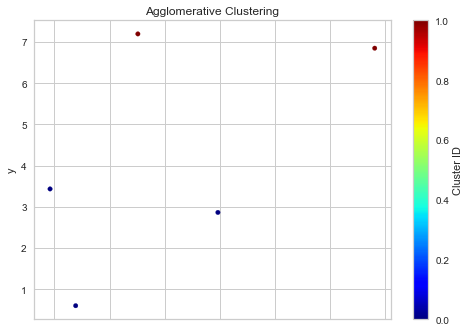

Text(0.5, 1.0, 'Dendogram')

Text(0.5, 0, 'Customer')

Text(0, 0.5, 'Euclidean Distance')

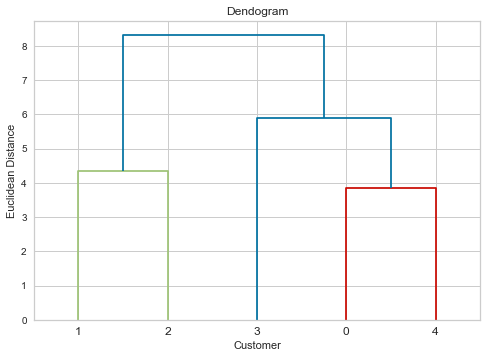

In [19]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

ac = AgglomerativeClustering(n_clusters=2, 
                             affinity='euclidean', 
                             linkage='complete').fit(X)

print('Cluster labels: %s' % ac.labels_)
labels = pd.DataFrame(ac.labels_,columns=['Cluster ID']) 
result = pd.concat((pd.DataFrame(X,columns=['x', 'y', 'z']),labels), axis=1)

result.plot.scatter(x='x',y='y',c='Cluster ID',colormap='jet',)
plt.title('Agglomerative Clustering')
plt.show()

dendrogram = sch.dendrogram(sch.linkage(X, method = 'complete'))
plt.title('Dendogram')
plt.xlabel('Data IDs')
plt.ylabel('Euclidean Distance')
plt.show()


# Locating regions of high density via DBSCAN

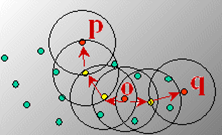

In [20]:
Image(filename='IMAGES/density.png', width=500) 

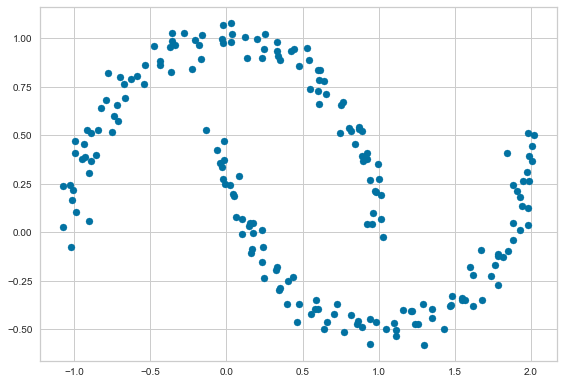

In [21]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=200, noise=0.05, random_state=0)
plt.scatter(X[:, 0], X[:, 1])
plt.tight_layout()
# plt.savefig('./figures/moons.png', dpi=300)
plt.show()

K-means and hierarchical clustering:

Text(0.5, 1.0, 'K-means clustering')

Text(0.5, 1.0, 'Agglomerative clustering')

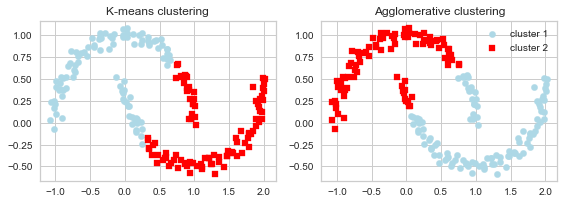

In [22]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 3))

km = KMeans(n_clusters=2, random_state=0)
y_km = km.fit_predict(X)
ax1.scatter(X[y_km == 0, 0], X[y_km == 0, 1],
            c='lightblue', marker='o', s=40, label='cluster 1')
ax1.scatter(X[y_km == 1, 0], X[y_km == 1, 1],
            c='red', marker='s', s=40, label='cluster 2')
ax1.set_title('K-means clustering')

ac = AgglomerativeClustering(n_clusters=2,
                             affinity='euclidean',
                             linkage='complete')
y_ac = ac.fit_predict(X)
ax2.scatter(X[y_ac == 0, 0], X[y_ac == 0, 1], c='lightblue',
            marker='o', s=40, label='cluster 1')
ax2.scatter(X[y_ac == 1, 0], X[y_ac == 1, 1], c='red',
            marker='s', s=40, label='cluster 2')
ax2.set_title('Agglomerative clustering')

plt.legend()
plt.tight_layout()
#plt.savefig('./figures/kmeans_and_ac.png', dpi=300)
plt.show()

### Density-based clustering:

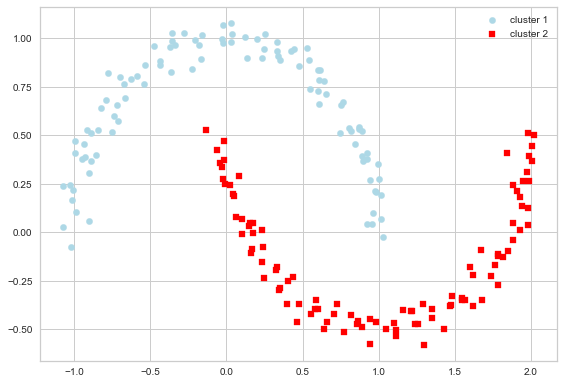

In [23]:
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=0.2, min_samples=5, metric='euclidean')
y_db = db.fit_predict(X)
plt.scatter(X[y_db == 0, 0], X[y_db == 0, 1],
            c='lightblue', marker='o', s=40,
            label='cluster 1')
plt.scatter(X[y_db == 1, 0], X[y_db == 1, 1],
            c='red', marker='s', s=40,
            label='cluster 2')
plt.legend()
plt.tight_layout()
plt.show()

# Question:

## Interpret the outcomes of the different algorithms.

# Question
## For each of the following datasets, choose an appropriate clustering approach

<AxesSubplot:>

Text(0.5, 1.0, 'Noisy circles data')

<AxesSubplot:>

Text(0.5, 1.0, 'Noisy moons data')

<AxesSubplot:>

Text(0.5, 1.0, 'Blobs data')

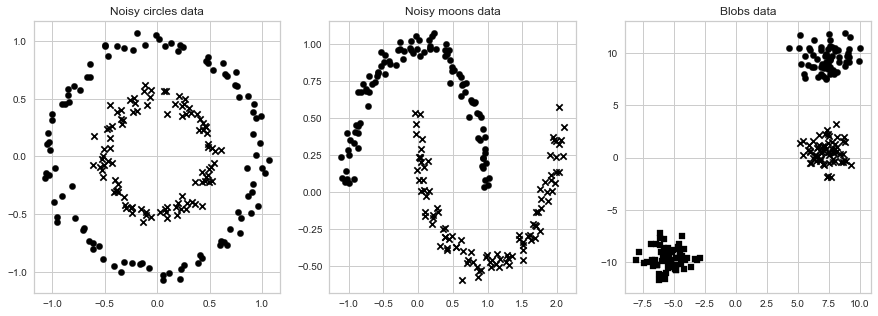

In [24]:

from sklearn import datasets
# ============
# Generate datasets. We choose the size big enough to see the scalability
# of the algorithms, but not too big to avoid too long running times
# ============
n_samples = 200
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=0.5, noise=0.05);

fig, ax = plt.subplots(1,3, figsize=(15, 5))
ind = np.where(noisy_circles[1]==0)
plt.subplot(1, 3, 1)
plt.scatter(noisy_circles[0][ind, 0], noisy_circles[0][ind, 1],
            c='black', marker='o', s=40)
ind = np.where(noisy_circles[1]==1)
plt.scatter(noisy_circles[0][ind, 0], noisy_circles[0][ind, 1],
            c='black', marker='x', s=40)
plt.title('Noisy circles data')


noisy_moons = datasets.make_moons(n_samples=n_samples, noise=0.05)
plt.subplot(1, 3, 2)
ind = np.where(noisy_moons[1]==0)
plt.scatter(noisy_moons[0][ind, 0], noisy_moons[0][ind, 1],
            c='black', marker='o', s=40)
ind = np.where(noisy_moons[1]==1)
plt.scatter(noisy_moons[0][ind, 0], noisy_moons[0][ind, 1],
            c='black', marker='x', s=40)
plt.title('Noisy moons data')


blobs = datasets.make_blobs(n_samples=n_samples, centers=3, random_state=8)
plt.subplot(1, 3, 3)
ind = np.where(blobs[1]==0)
plt.scatter(blobs[0][ind, 0], blobs[0][ind, 1],
            c='black', marker='o', s=40)
ind = np.where(blobs[1]==1)
plt.scatter(blobs[0][ind, 0], blobs[0][ind, 1],
            c='black', marker='x', s=40)
ind = np.where(blobs[1]==2)
plt.scatter(blobs[0][ind, 0], blobs[0][ind, 1],
            c='black', marker='s', s=40)
plt.title('Blobs data')
plt.show()


In [25]:
#place your code here!